# SQLAlchemy Homework - Surfs Up!


Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area. The following outlines what you need to do.

## Step 1 - Climate Analysis and Exploration

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Use the provided [starter notebook](climate_starter.ipynb) and [hawaii.sqlite](Resources/hawaii.sqlite) files to complete your climate analysis and data exploration.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

* Link Python to the database by creating an SQLAlchemy session.

* **Important** Don't forget to close out your session at the end of your notebook.

### Precipitation Analysis

* Start by finding the most recent date in the data set.

* Using this date, retrieve the last 12 months of precipitation data by querying the 12 preceding months of data. **Note** you do not pass in the date as a variable to your query.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

### Station Analysis

* Design a query to calculate the total number of stations in the dataset.

* Design a query to find the most active stations (i.e. which stations have the most rows?).

  * List the stations and observation counts in descending order.

  * Which station id has the highest number of observations?

  * Using the most active station id, calculate the lowest, highest, and average temperature.

  * Hint: You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (TOBS).

  * Filter by the station with the highest number of observations.

  * Query the last 12 months of temperature observation data for this station.

  * Plot the results as a histogram with `bins=12`.

 
* Close out your session.



In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(engine, reflect=True)

### CHECK: reflection was done properly by printing all classes mapped to base

base.classes.keys()

['measurement', 'station']

In [6]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Reflect Table and Save references to each table
measurement = base.classes.measurement
station = base.classes.station

# Create a session
session = Session(engine)

In [8]:
# CHECK: Use the session to query Demographics table and display the first 5 locations
for row in session.query(measurement, measurement.station).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x000002129A784FD0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000002129A79F0D0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000002129A79F160>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000002129A79F1C0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x000002129A79F220>, 'USC00519397')


In [9]:
# CHECK: Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# CHECK: Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set from measurement table
from datetime import datetime

recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23')

In [12]:
recent = datetime.strptime('2017-08-23',"%Y-%m-%d")
recent

datetime.datetime(2017, 8, 23, 0, 0)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Calculate the date one year from the last date in data set.
one_year_back = recent-dt.timedelta(days=366)
one_year_back

datetime.datetime(2016, 8, 22, 0, 0)

In [14]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date,measurement.prcp).\
    filter(measurement.date > one_year_back).\
    order_by(measurement.date).all()
results

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results).set_index('date')
df = df.sort_index()
df = df[df['prcp'].notna()]
df
# CHECK: to see if query was correct
#df.to_csv("prcp_test3.csv", index=True)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [16]:
len(results)
len(df)

2021

Text(0, 0.5, 'Inches')

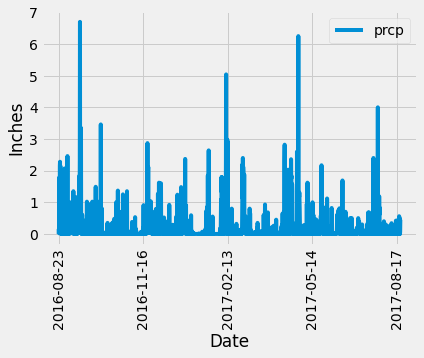

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(func.count(station.station)).all()
total_station

[(9)]

In [20]:
session.query(station.station).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
active_station

('USC00519281', 2772)

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(measurement.station, func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Frequency of Tempature in station USC00519281')

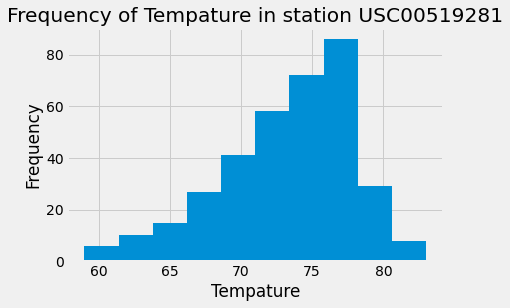

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == 'USC00519281',(measurement.date > one_year_back)).all()
most_active


df2 = pd.DataFrame(most_active).set_index('date')
df2.hist()
plt.xlabel("Tempature")
plt.ylabel("Frequency")
plt.title("Frequency of Tempature in station USC00519281")

# Close session

In [24]:
# Close Session
session.close()


- - -

## Step 2 - Climate App

Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

* Use Flask to create your routes.

### Routes

* `/`

  * Home page.

  * List all routes that are available.

* `/api/v1.0/precipitation`

  * Convert the query results to a dictionary using `date` as the key and `prcp` as the value.

  * Return the JSON representation of your dictionary.

* `/api/v1.0/stations`

  * Return a JSON list of stations from the dataset.

* `/api/v1.0/tobs`
  * Query the dates and temperature observations of the most active station for the last year of data.

  * Return a JSON list of temperature observations (TOBS) for the previous year.

* `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`

  * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.

  * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.

  * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.

## Hints

* You will need to join the station and measurement tables for some of the queries.

* Use Flask `jsonify` to convert your API data into a valid JSON response object.

